<a href="https://colab.research.google.com/github/SoumyaTathagata/GGV-Intern/blob/main/GGV_Intern_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px 
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
import warnings
warnings.filterwarnings("ignore")

##Reading and viewing the data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
df=pd.read_csv("/content/drive/MyDrive/Covid 19 Confirmed Cases-Kerala.csv")
df.head()

,Date,Confirmed
0,31-01-2020,0
1,01-02-2020,0
2,02-02-2020,1
3,03-02-2020,1
4,04-02-2020,0


In [6]:
df.shape

(500, 2)

In [7]:
df.isnull().sum()

Date         0
Confirmed    0
dtype: int64

In [8]:
df.set_index('Date',inplace=True)

In [9]:
df.head()

,Confirmed
Date,
31-01-2020,0
01-02-2020,0
02-02-2020,1
03-02-2020,1
04-02-2020,0


In [10]:
df.describe()

,Confirmed
count,500.000000
mean,5456.456000
std,8565.571023
min,0.000000
25%,77.250000
50%,2634.500000
75%,6030.000000
max,43529.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 31-01-2020 to 13-06-2021
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Confirmed  500 non-null    int64
dtypes: int64(1)
memory usage: 7.8+ KB


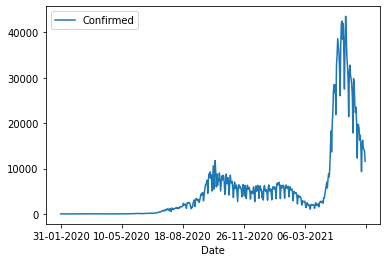

In [12]:
df.plot()
pyplot.show()

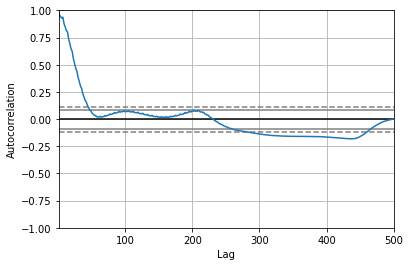

In [13]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Confirmed'])
plt.show()

##Applying adfuller test.

In [14]:
from statsmodels.tsa.stattools import adfuller

test_result=adfuller(df['Confirmed'])

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Confirmed):
    result=adfuller(Confirmed)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(df['Confirmed'])


ADF Test Statistic : -3.2318080946777297
p-value : 0.01821576681889486
#Lags Used : 17
Number of Observations Used : 482
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [15]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Confirmed'])
test_result
print('ADF Statistic: %f' % test_result[0])
print('p-value: %f' % test_result[1])

ADF Statistic: -3.231808
p-value: 0.018216


##Applying ARIMA.

In [16]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df['Confirmed'], order=(1,1,2)) 
model_fit = model.fit(disp=0)
print(model_fit.summary())


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                             ARIMA Model Results                              
Dep. Variable:            D.Confirmed   No. Observations:                  499
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -4448.184
Method:                       css-mle   S.D. of innovations           1797.955
Date:                Wed, 14 Jul 2021   AIC                           8906.369
Time:                        13:26:11   BIC                           8927.432
Sample:                             1   HQIC                          8914.634
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                25.3981     48.011      0.529      0.597     -68.702     119.498
ar.L1.D.Confirmed    -0.6764      0.051    -13.250      0.000      -0.776      -0.576
ma.L1.D.Confirmed     0.

In [17]:
model = ARIMA(df['Confirmed'], order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Confirmed   No. Observations:                  499
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4467.391
Method:                       css-mle   S.D. of innovations           1869.833
Date:                Wed, 14 Jul 2021   AIC                           8942.783
Time:                        13:26:12   BIC                           8959.633
Sample:                             1   HQIC                          8949.396
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                25.7911     47.730      0.540      0.589     -67.758     119.340
ar.L1.D.Confirmed     0.3061      0.073      4.180      0.000       0.163       0.450
ma.L1.D.Confirmed    -0.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



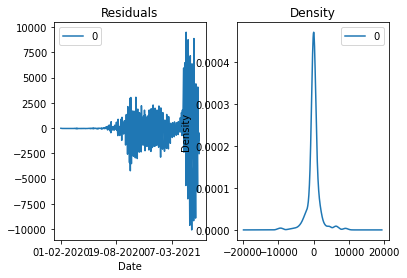

In [18]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

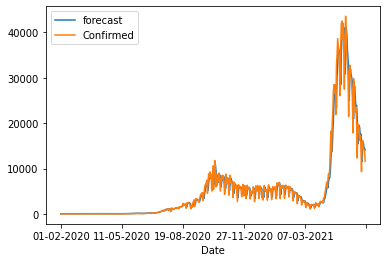

In [19]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

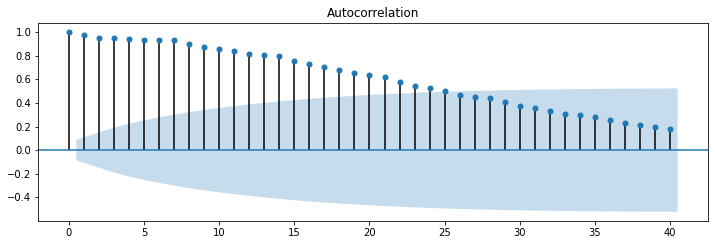

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Confirmed'].iloc[:],lags=40,ax=ax1) 

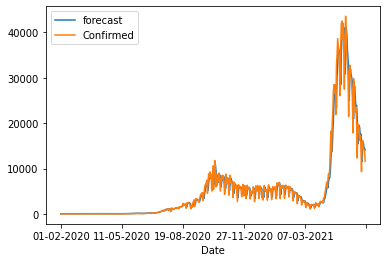

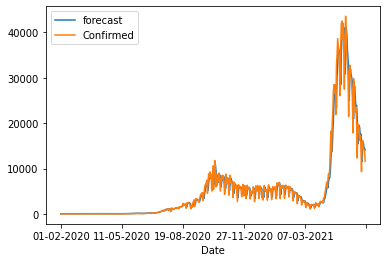

In [21]:
model_fit.plot_predict(dynamic=False)

###Here we can see that there is sudden increase in covid cases during April.

In [22]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 8.8MB/s 
     |████████████████████████████████| 9.5MB 27.4MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(df['Confirmed'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

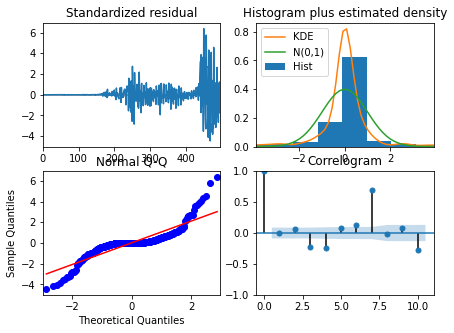

In [24]:
model.plot_diagnostics(figsize=(7,5))
plt.show()


##Final forecast using ARIMA

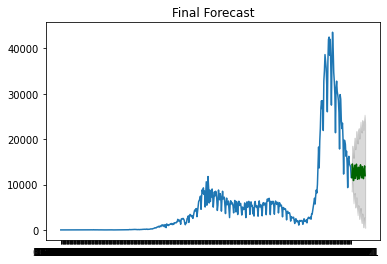

In [25]:
# Forecast

n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df['Confirmed']), len(df['Confirmed'])+n_periods)

# make series for plotting purpose
fc_df = pd.Series(fc, index=index_of_fc)
lower_df = pd.Series(confint[:, 0], index=index_of_fc)
upper_df = pd.Series(confint[:, 1], index=index_of_fc)


# Plot
plt.plot(df['Confirmed'])
plt.plot(fc_df, color='darkgreen')
plt.fill_between(lower_df.index, 
                 lower_df, 
                 upper_df, 
                 color='k', alpha=.15)

plt.title("Final Forecast")
plt.show()

##Building SARIMA model

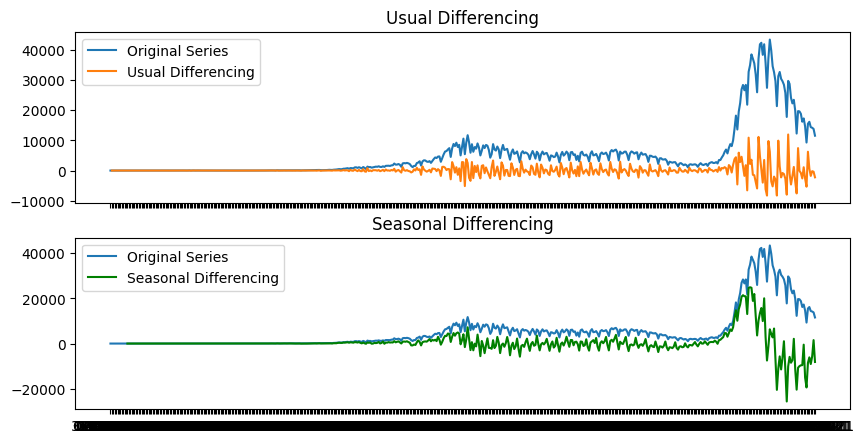

In [29]:
# Import
data = df['Confirmed']

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)

plt.show()

In [ ]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA

smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=31,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[31] intercept   : AIC=inf, Time=48.23 sec
 ARIMA(0,0,0)(0,1,0)[31] intercept   : AIC=9839.643, Time=0.22 sec
 ARIMA(1,0,0)(1,1,0)[31] intercept   : AIC=8564.790, Time=25.16 sec
 ARIMA(0,0,1)(0,1,1)[31] intercept   : AIC=inf, Time=39.69 sec
 ARIMA(0,0,0)(0,1,0)[31]             : AIC=9851.481, Time=0.11 sec
 ARIMA(1,0,0)(0,1,0)[31] intercept   : AIC=8675.810, Time=0.30 sec
 ARIMA(1,0,0)(2,1,0)[31] intercept   : AIC=8556.767, Time=75.07 sec
 ARIMA(1,0,0)(2,1,1)[31] intercept   : AIC=inf, Time=113.13 sec
 ARIMA(1,0,0)(1,1,1)[31] intercept   : AIC=inf, Time=63.66 sec
 ARIMA(0,0,0)(2,1,0)[31] intercept   : AIC=inf, Time=18.59 sec
 ARIMA(2,0,0)(2,1,0)[31] intercept   : AIC=8548.707, Time=78.53 sec
 ARIMA(2,0,0)(1,1,0)[31] intercept   : AIC=8551.865, Time=27.76 sec
 ARIMA(2,0,0)(2,1,1)[31] intercept   : AIC=inf, Time=129.57 sec
 ARIMA(2,0,0)(1,1,1)[31] intercept   : AIC=inf, Time=67.32 sec
 ARIMA(3,0,0)(2,1,0)[31] intercept   : AI